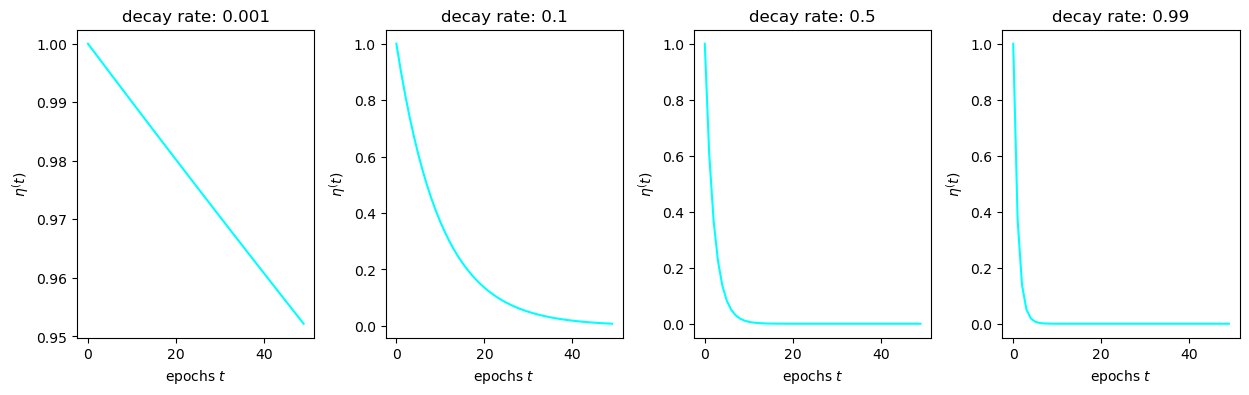

In [63]:
# Programando un Mapa Auto-organizado (SOM o Red de Kohonen)
# Self-Organizing Maps: Theory and Implementation in Python with NumPy
# https://stackabuse.com/self-organizing-maps-theory-and-implementation-in-python-with-numpy/

# importar algunas bibliotecas
import numpy as np
import matplotlib.pyplot as plt

# decrecimiento de razón de aprendizaje con diferentes razones de decrecimineto
epochs = np.arange(0, 50)
lr_decay = [0.001, 0.1, 0.5, 0.99]
fig,ax = plt.subplots(nrows=1, ncols=4, figsize=(15,4))
plt_ind = np.arange(4) + 141
for decay, ind in zip(lr_decay, plt_ind):
    plt.subplot(ind)
    learn_rate = np.exp(-epochs * decay)
    plt.plot(epochs, learn_rate, c='cyan')
    plt.title('decay rate: ' + str(decay))
    plt.xlabel('epochs $t$')
    plt.ylabel('$\eta^(t)$')
fig.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()


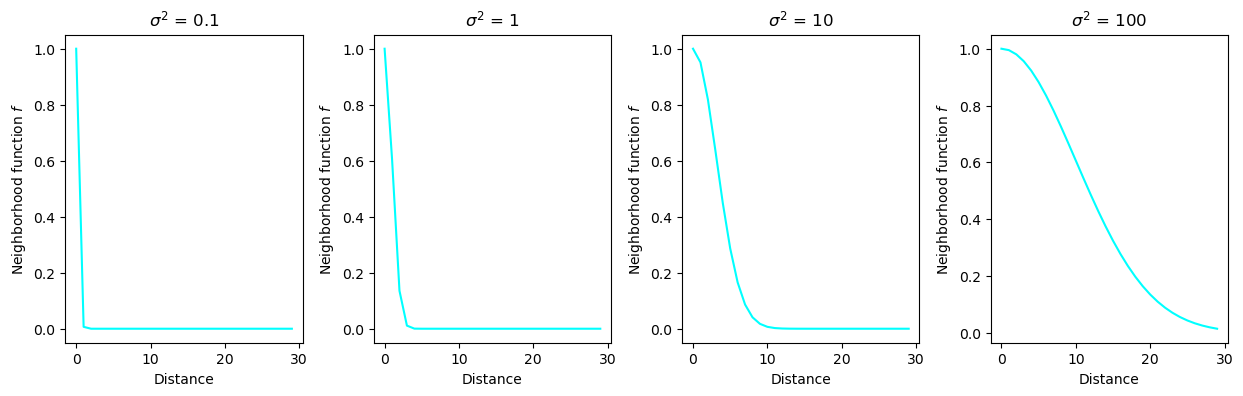

In [64]:
# efecto del radio en la función de distancia de vecindad
distance = np.arange(0, 30)
sigma_sq = [0.1, 1, 10, 100]
fig,ax = plt.subplots(nrows=1, ncols=4, figsize=(15,4))
plt_ind = np.arange(4) + 141
for s, ind in zip(sigma_sq, plt_ind):
    plt.subplot(ind)
    f = np.exp(-distance ** 2 / 2 / s)
    plt.plot(distance, f, c='cyan')
    plt.title('$\sigma^2$ = ' + str(s))
    plt.xlabel('Distance')
    plt.ylabel('Neighborhood function $f$')
fig.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

In [65]:
# Return the (g,h) index of the BMU in the grid
def find_BMU(SOM,x):
    distSq = (np.square(SOM - x)).sum(axis=2)
    return np.unravel_index(np.argmin(distSq, axis=None), distSq.shape)
    
# Update the weights of the SOM cells when given a single training example
# and the model parameters along with BMU coordinates as a tuple
def update_weights(SOM, train_ex, learn_rate, radius_sq, 
                   BMU_coord, step=3):
    g, h = BMU_coord
    #if radius is close to zero then only BMU is changed
    if radius_sq < 1e-3:
        SOM[g,h,:] += learn_rate * (train_ex - SOM[g,h,:])
        return SOM
    # Change all cells in a small neighborhood of BMU
    for i in range(max(0, g-step), min(SOM.shape[0], g+step)):
        for j in range(max(0, h-step), min(SOM.shape[1], h+step)):
            dist_sq = np.square(i - g) + np.square(j - h)
            dist_func = np.exp(-dist_sq / 2 / radius_sq)
            SOM[i,j,:] += learn_rate * dist_func * (train_ex - SOM[i,j,:])   
    return SOM    

# Main routine for training an SOM. It requires an initialized SOM grid
# or a partially trained grid as parameter
def train_SOM(SOM, train_data, learn_rate = .1, radius_sq = 1, 
             lr_decay = .1, radius_decay = .1, epochs = 10):    
    learn_rate_0 = learn_rate
    radius_0 = radius_sq
    for epoch in np.arange(0, epochs):
        rand.shuffle(train_data)      
        for train_ex in train_data:
            g, h = find_BMU(SOM, train_ex)
            SOM = update_weights(SOM, train_ex, 
                                 learn_rate, radius_sq, (g,h))
        # Update learning rate and radius
        learn_rate = learn_rate_0 * np.exp(-epoch * lr_decay)
        radius_sq = radius_0 * np.exp(-epoch * radius_decay)            
    return SOM
    

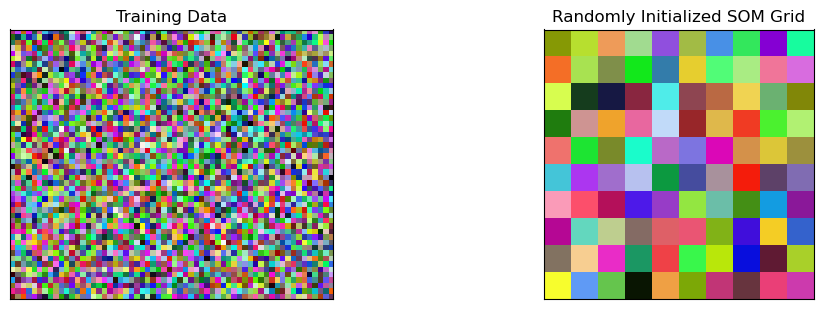

In [66]:
# EJECUTANDO SOM en un problema práctico

# Dimensions of the SOM grid
m = 10
n = 10
# Number of training examples
n_x = 3000
rand = np.random.RandomState(0)
# Initialize the training data
train_data = rand.randint(0, 255, (n_x, 3))
# Initialize the SOM randomly
SOM = rand.randint(0, 255, (m, n, 3)).astype(float)
# Display both the training matrix and the SOM grid
fig, ax = plt.subplots(
    nrows=1, ncols=2, figsize=(12, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(train_data.reshape(50, 60, 3))
ax[0].title.set_text('Training Data')
ax[1].imshow(SOM.astype(int))
ax[1].title.set_text('Randomly Initialized SOM Grid')
plt.show()

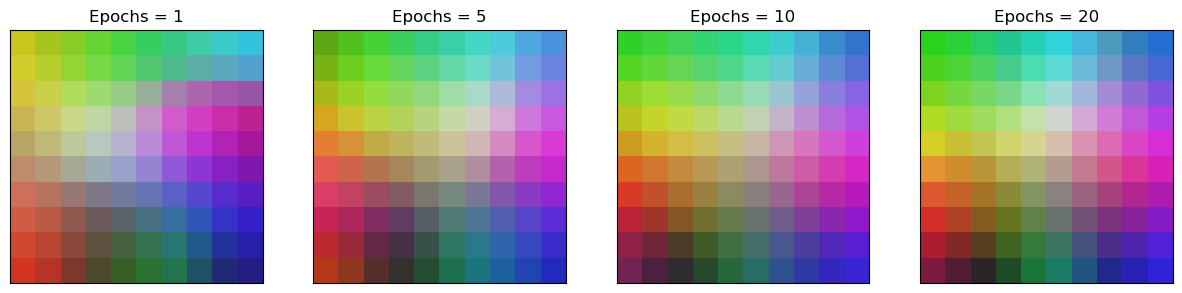

In [67]:
# Entrena la SOM por 5 épocas
fig, ax = plt.subplots(
    nrows=1, ncols=4, figsize=(15, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
total_epochs = 0
for epochs, i in zip([1, 4, 5, 10], range(0,4)):
    total_epochs += epochs
    SOM = train_SOM(SOM, train_data, epochs=epochs)
    ax[i].imshow(SOM.astype(int))
    ax[i].title.set_text('Epochs = ' + str(total_epochs))
plt.show()

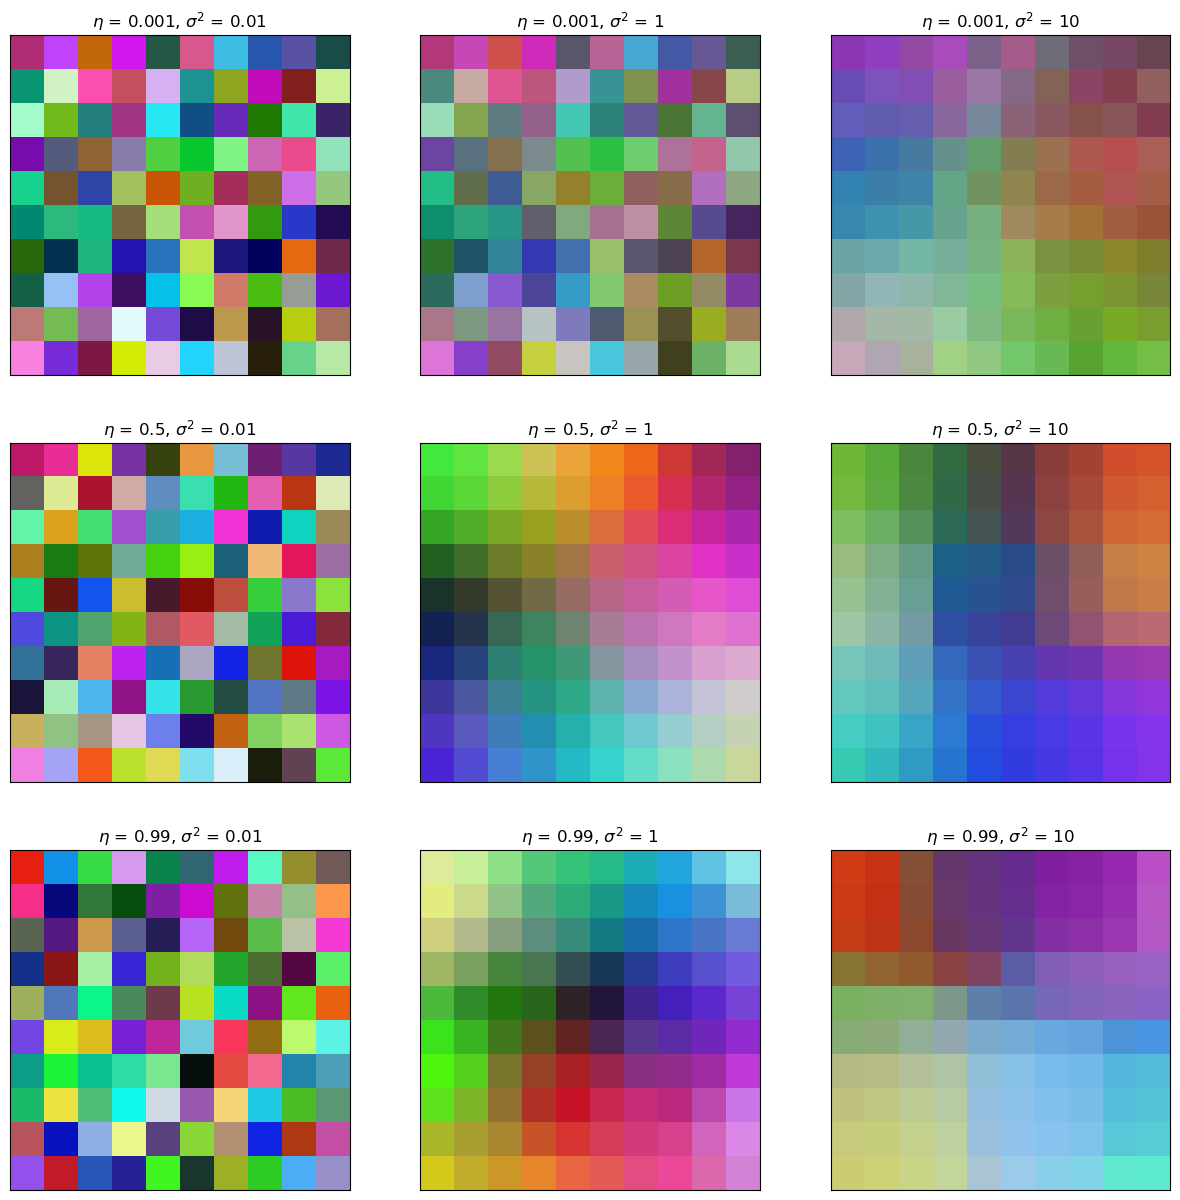

In [68]:
# Efecto de diferentes razones de aprendizajes y radios en SOM
fig, ax = plt.subplots(
    nrows=3, ncols=3, figsize=(15, 15), 
    subplot_kw=dict(xticks=[], yticks=[]))
# Initialize the SOM randomly to the same state
for learn_rate, i in zip([0.001, 0.5, 0.99], [0, 1, 2]):
    for radius_sq, j in zip([0.01, 1, 10], [0, 1, 2]):
        rand = np.random.RandomState(0)
        SOM = rand.randint(0, 255, (m, n, 3)).astype(float)        
        SOM = train_SOM(SOM, train_data, epochs = 5,
                        learn_rate = learn_rate, 
                        radius_sq = radius_sq)
        ax[i][j].imshow(SOM.astype(int))
        ax[i][j].title.set_text('$\eta$ = ' + str(learn_rate) + 
                                ', $\sigma^2$ = ' + str(radius_sq))
plt.show()


# Modificado

In [69]:
# Return the (g,h) index of the BMU in the grid
def find_BMU(SOM, x):
    distManhattan = np.abs(SOM - x).sum(axis=2)  # Cambiado de distancia Euclideana a Manhattan
    return np.unravel_index(np.argmin(distManhattan, axis=None), distManhattan.shape)

# Update the weights of the SOM cells when given a single training example
# and the model parameters along with BMU coordinates as a tuple
def update_weights(SOM, train_ex, learn_rate, radius_sq, BMU_coord, step):
    g, h = BMU_coord
    if radius_sq < 1e-3:
        SOM[g, h, :] += learn_rate * (train_ex - SOM[g, h, :])
        return SOM
    for i in range(max(0, g-step), min(SOM.shape[0], g+step)):
        for j in range(max(0, h-step), min(SOM.shape[1], h+step)):
            dist_sq = np.square(i - g) + np.square(j - h)
            dist_func = np.exp(-dist_sq / 2 / radius_sq)
            SOM[i, j, :] += learn_rate * dist_func * (train_ex - SOM[i, j, :])
    return SOM

def apply_mutation(SOM, mutation_rate=0.01):
    mutation = np.random.uniform(-mutation_rate, mutation_rate, SOM.shape)
    SOM += mutation
    return SOM


# Main routine for training an SOM. It requires an initialized SOM grid
# or a partially trained grid as parameter
def train_SOM(SOM, train_data, learn_rate=0.1, radius_sq=1, 
              lr_decay=0.1, radius_decay=0.1, epochs=10, mutation_rate=0.01):    
    learn_rate_0 = learn_rate
    radius_0 = radius_sq
    for epoch in np.arange(0, epochs):
        rand.shuffle(train_data)
        step = max(1, int(SOM.shape[0] / (epoch + 1)))  # Vecindario dinámico
        for train_ex in train_data:
            g, h = find_BMU(SOM, train_ex)
            SOM = update_weights(SOM, train_ex, learn_rate, radius_sq, (g, h), step)
        # Actualización del learning rate y radius
        learn_rate = learn_rate_0 * np.exp(-epoch * lr_decay)
        radius_sq = radius_0 * np.exp(-epoch * radius_decay)
        # Aplicar mutación después de cada época
        SOM = apply_mutation(SOM, mutation_rate)
    return SOM

    

In [70]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [71]:
df = pd.read_csv("Credit_Card_Applications.csv")
dataset = df.to_numpy()

In [72]:
dataset.shape

(690, 16)

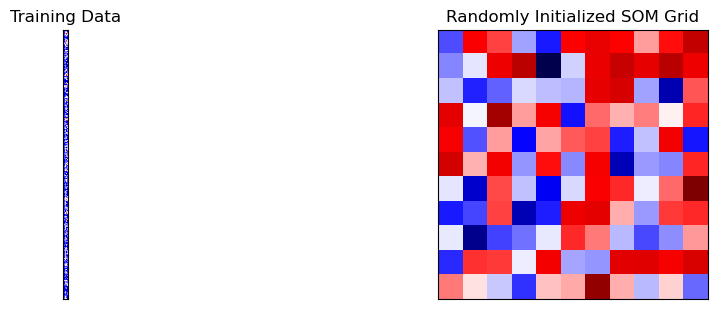

In [73]:
# Normalizar los datos
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(dataset)

# Dimensions of the SOM grid
m = 11
n = 11


# Inicializar el SOM con muestras aleatorias de los datos de tarjetas de credito
num_nodes = m * n
random_indices = np.random.choice(X_normalized.shape[0], size=num_nodes, replace=True)
SOM = X_normalized[random_indices].reshape(m, n, dataset.shape[1])


# Display both the training matrix and the SOM grid
fig, ax = plt.subplots(
    nrows=1, ncols=2, figsize=(12, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
credit_card = X_normalized[:, :15]  # Adjusted for the actual shape of your data
ax[0].imshow(credit_card.reshape(credit_card.shape[0], 15), cmap='seismic')  
ax[0].title.set_text('Training Data')
ax[1].imshow(np.linalg.norm(SOM, axis=2), cmap='seismic')
ax[1].title.set_text('Randomly Initialized SOM Grid')
plt.show()

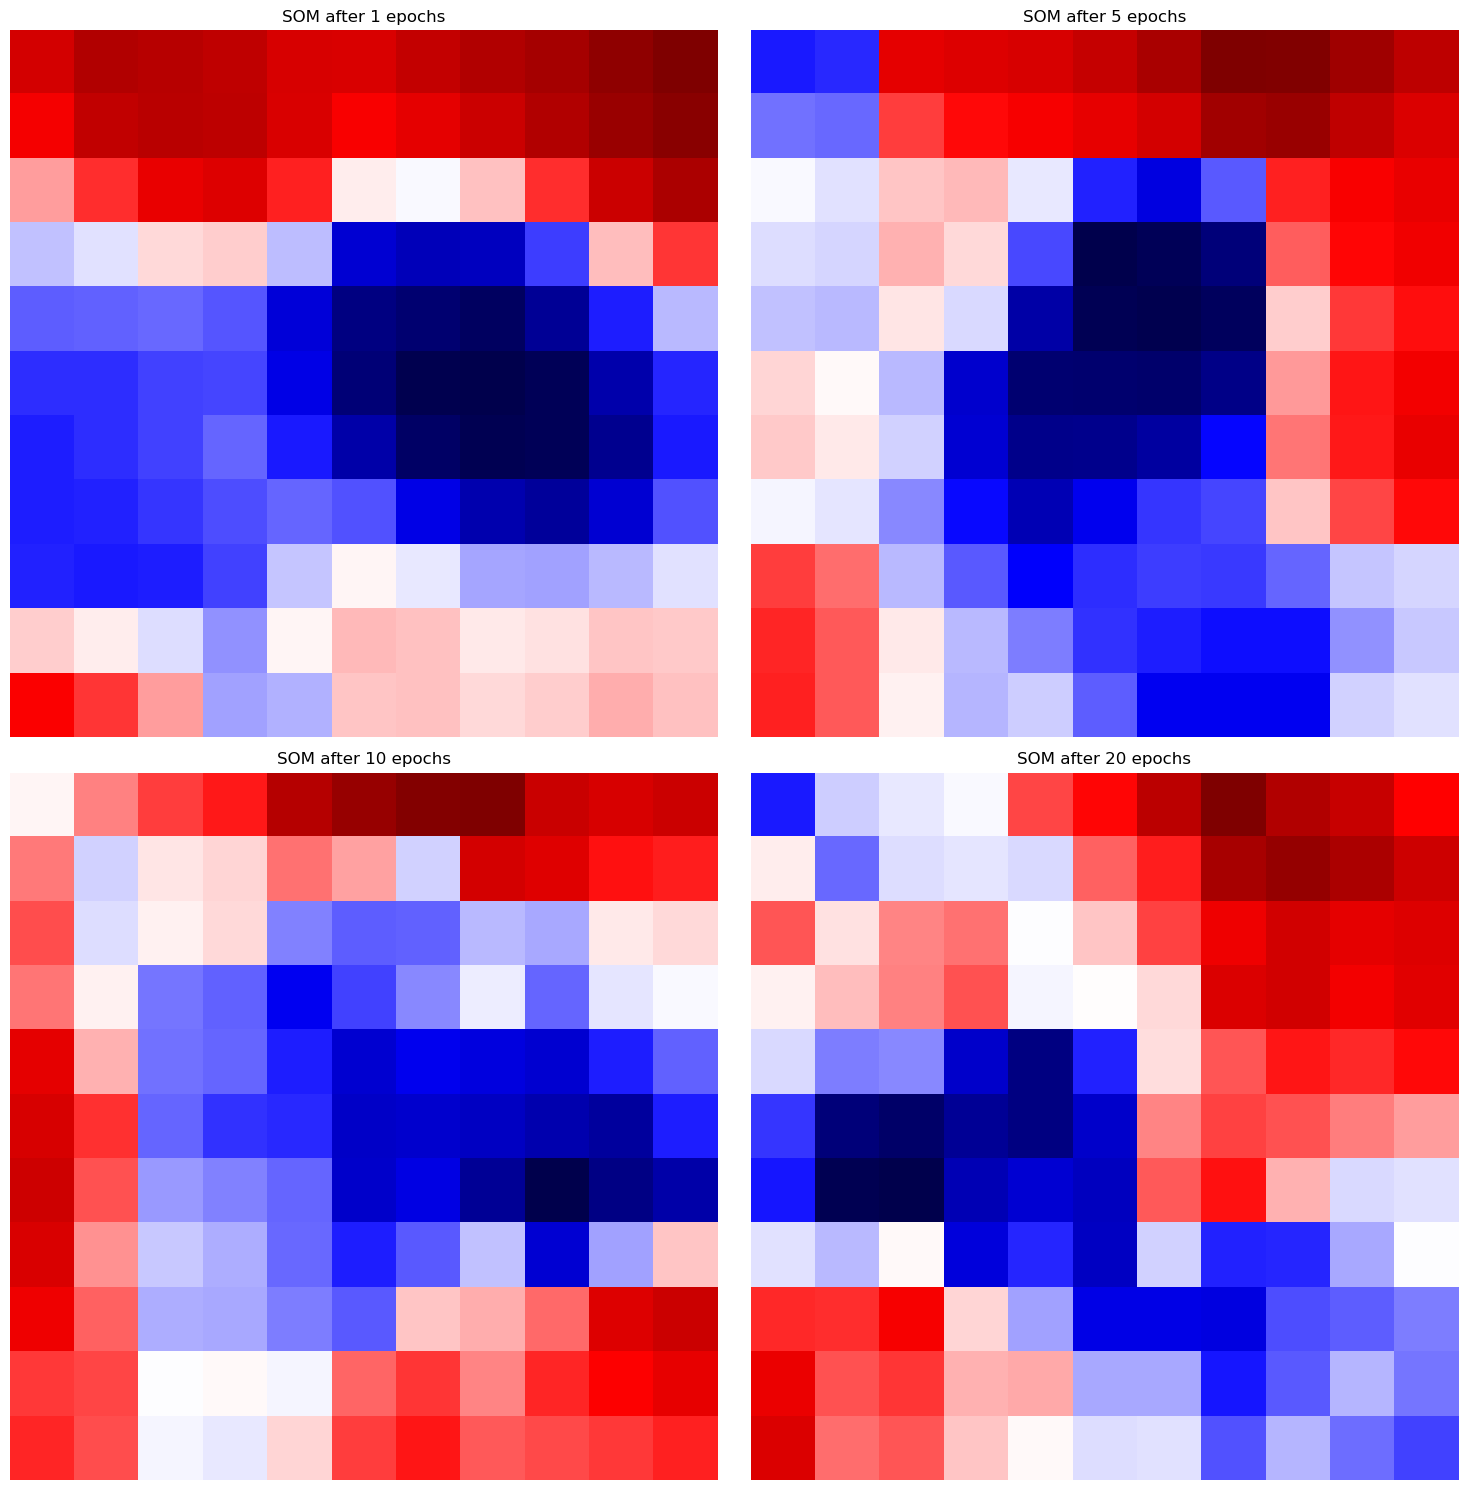

In [74]:
# Entrena la SOM por épocas
from filecmp import cmp


epochs_list = [1, 5, 10, 20]
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs = axs.ravel()

for i, epochs in enumerate(epochs_list):
    SOM_trained = train_SOM(SOM.copy(), X_normalized, learn_rate=0.1, radius_sq=2, lr_decay=0.2, radius_decay=0.2, epochs=epochs)
    
    axs[i].imshow(np.linalg.norm(SOM_trained, axis=2), cmap='seismic')
    axs[i].set_title(f'SOM after {epochs} epochs')
    axs[i].axis('off')

plt.tight_layout()
plt.show()

In [75]:
    #Create an array where appear "approved" if 1 and "denied" if 0
approved = np.empty(dataset.shape[0], dtype=object)
for i in range(dataset.shape[0]):
    if dataset[i, -1] == 1:
        approved[i] = "Aprobado"
    else:
        approved[i] = "Denegado"
        

In [76]:
#Get the unique labels
unique_labels = np.unique(approved)
unique_labels

array(['Aprobado', 'Denegado'], dtype=object)

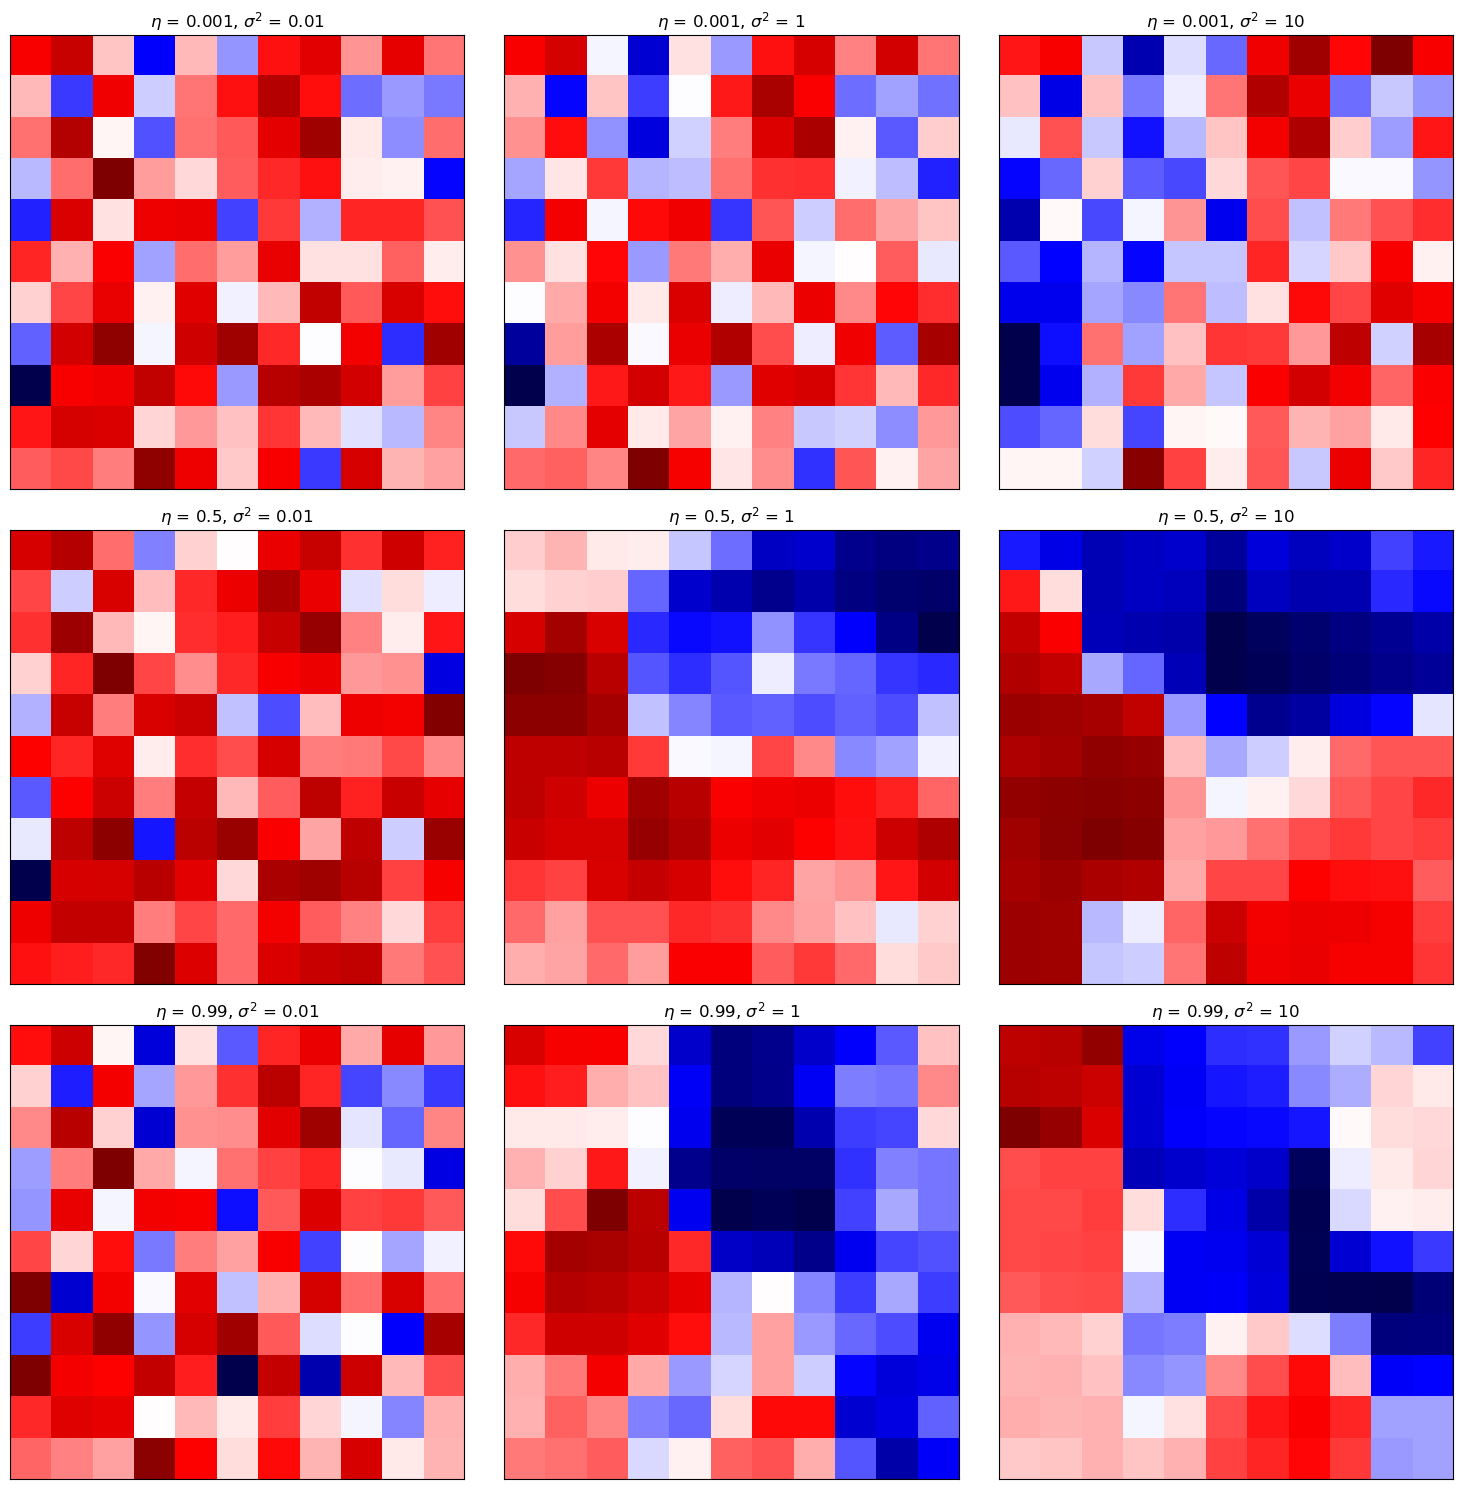

In [79]:
# Efecto de diferentes razones de aprendizajes y radios en SOM
fig, ax = plt.subplots(
    nrows=3, ncols=3, figsize=(15, 15), 
    subplot_kw=dict(xticks=[], yticks=[]))

# Initialize the SOM randomly to the same state
for learn_rate, i in zip([0.001, 0.5, 0.99], [0, 1, 2]):
    for radius_sq, j in zip([0.01, 1, 10], [0, 1, 2]):
        rand = np.random.RandomState(0)
        
        # Initialize SOM with normalized random values
        SOM = rand.rand(m, n, X_normalized.shape[1])  # Normalized to [0, 1]
        
        # Train SOM
        SOM = train_SOM(SOM, X_normalized, epochs=5,
                        learn_rate=learn_rate, 
                        radius_sq=radius_sq)
        
        # Plot the SOM
        ax[i][j].imshow(np.linalg.norm(SOM, axis=2), cmap='seismic')
        ax[i][j].title.set_text('$\eta$ = ' + str(learn_rate) + 
                                ', $\sigma^2$ = ' + str(radius_sq))

plt.tight_layout()
plt.show()

# Conclusión

Se cambio el dataset para saber si a una persona le aprobarian o no una tarjeta de credito, esto me permitio hacer un tipo de clustering no supervisado.

Es trabajo me ayudó a entender como las redes SOM funcionan y cómo los parámetros afectan la organización de los datos en la cuadrícula. Se cambio la metrica de distancia y la manera de ordenar los colores cambio drasticamente, esto me ayudó a ver como distintas medidas distancias importan al momento de medir el error o que tan cercano es un valor en cuestión de dimensiones. Usar la distancia Manhattan en lugar de la Euclideana permitió que el SOM encontrara una relación distinta entre los datos.

Se hizo que el vecindario cambiara dinamicamente pues esto permite una mayor presición a la hora de evaluar diferencias similares entre colores, esto permite primero explorar grandes regiones y despues converger a vecindarios más pequeños. Esto fue algo que aprendí en la clase de bioinspirados que queria saber si funcionaria aqui.

El concepto de aplicar mutaciónes es algo que habia implementado en otros algoritmos y en este caso queria aplicarlo pues cambiaria las soluciones donde el modelo pudiera estancarse, esto ayuda con los minimos y maximos locales, lo que permite al modelo obtener soluciones distintas.

Lo ultimo que cambie  ajustar el radio inicial me permitió ver cómo un vecindario más amplio al principio ayudaba al modelo a explorar mejor el espacio de características, pero hacer más lento el proceso de converger.